In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95)) & (d.i == 0) & (d.nmappers <= 16)]
d2['ratek'] = d2['rate']/1000

/tmp/ipykernel_958018/3767368495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['ratek'] = d2['rate']/1000


In [11]:
print(d2['ratek'].unique().tolist())
#d3 = d2[d2.ratek==100.0]
#print(d3)

scatterm = {
    100.0: '^',
    200.0: 'o',
    300.0: 'v',
    400.0: '*'
}

[100.0, 200.0, 300.0, 400.0]


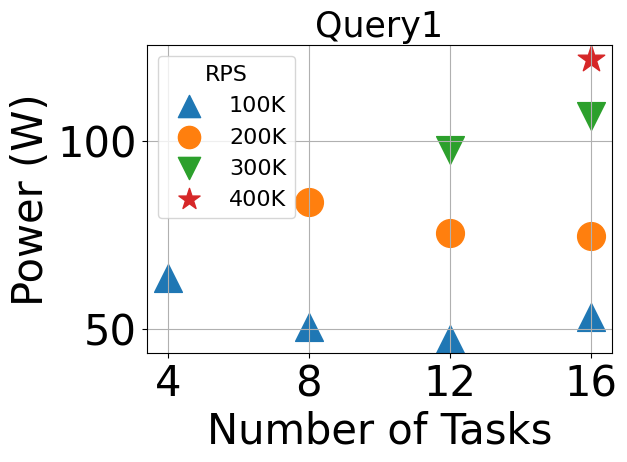

In [23]:
plt.rcParams['figure.figsize'] = 6,4
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

for rk in d2['ratek'].unique().tolist():
    d3 = d2[d2.ratek==rk]
    plt.scatter(d3['nmappers'], d3['pkg_watts_avg'], s=400, marker=scatterm[rk], label=f"{int(rk)}K")
#plt.scatter(d2['nmappers'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)

#plt.colorbar(label='RPS (K)')
plt.xticks(d2.nmappers.unique())
plt.xlabel('Number of Tasks')
plt.ylabel('Power (W)')
plt.title('Query1', size=25)
plt.legend(markerscale=0.8, fontsize=16, title="RPS", title_fontsize=16)
#plt.ylim(bottom=0)
#plt.xlim(left=0)
plt.grid()
plt.savefig("query1diffmappers.pdf", bbox_inches='tight')


# Analysis

We find at lower RPS rates (100K, 200K) that scaling up the number of Mappers results in lower power use for the same load, at 26% for 100K and 14% at 200K. When the Mapper node is getting more saturated (300K, 400K), we don't see this effect. 

In [5]:
d2[(d2.rate==100000)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
0,4,63.49
1,8,50.58
2,12,47.34
3,16,53.24


In [6]:
d2[(d2.rate==200000)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
5,8,83.66
6,12,75.33
7,16,74.78


In [7]:
d2[(d2.rate==300000)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
10,12,97.41
11,16,106.63


In [12]:
d2[(d2.rate==400000)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
15,16,121.8
